In [1]:
import pandas as pd

In [130]:
df1=pd.read_csv("F:/Uber Request Data.csv")

In [131]:
df1.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [179]:
len(df1["Request id"].unique())

6745

In [133]:
df1.shape

(6745, 6)

In [134]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [135]:
df1.isna().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [136]:
df1.isna().sum()/df1.shape[0]*100

Request id            0.000000
Pickup point          0.000000
Driver id            39.288362
Status                0.000000
Request timestamp     0.000000
Drop timestamp       58.028169
dtype: float64

In [137]:
df1["Request timestamp"].value_counts()

11/7/2016 17:57        6
11/7/2016 8:37         6
11/7/2016 9:40         6
11/7/2016 19:02        6
12/7/2016 19:31        5
                      ..
15-07-2016 01:04:28    1
13-07-2016 04:32:49    1
11/7/2016 22:11        1
13-07-2016 17:32:02    1
14-07-2016 07:30:30    1
Name: Request timestamp, Length: 5618, dtype: int64

In [138]:
df1["Request timestamp"]=df1["Request timestamp"].astype(str)

In [139]:
df1["Request timestamp"]=df1["Request timestamp"].replace("/","-")

In [140]:
df1["Request timestamp"]=pd.to_datetime(df1["Request timestamp"],dayfirst=True)

In [142]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 316.3+ KB


In [144]:
df1["Drop timestamp"]=df1["Drop timestamp"].astype(str)

In [145]:
df1["Drop timestamp"]=pd.to_datetime(df1["Drop timestamp"],dayfirst=True)

In [146]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.3+ KB


In [147]:
req_hour=df1["Request timestamp"].dt.hour

In [148]:
len(req_hour)

6745

In [149]:
df1["req_hour"]=req_hour

In [150]:
req_hour

0       11
1       17
2        9
3       21
4        8
        ..
6740    23
6741    23
6742    23
6743    23
6744    23
Name: Request timestamp, Length: 6745, dtype: int64

In [151]:
req_day=df1["Request timestamp"].dt.day

In [71]:
len(req_day)

6745

In [155]:
df1["req_day"]=req_day

In [156]:
req_day

0       11
1       11
2       12
3       12
4       13
        ..
6740    15
6741    15
6742    15
6743    15
6744    15
Name: Request timestamp, Length: 6745, dtype: int64

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt


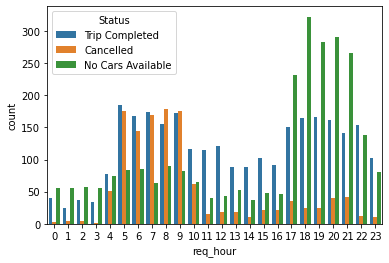

In [152]:
sns.countplot(x="req_hour",data=df1,hue="Status")
plt.show()

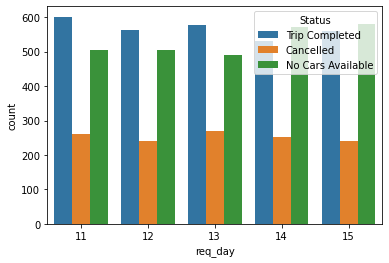

In [157]:
sns.countplot(x="req_day",data=df1 ,hue="Status")
plt.show()

C:\Users\Sandy Naruto\anaconda3\sandy\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


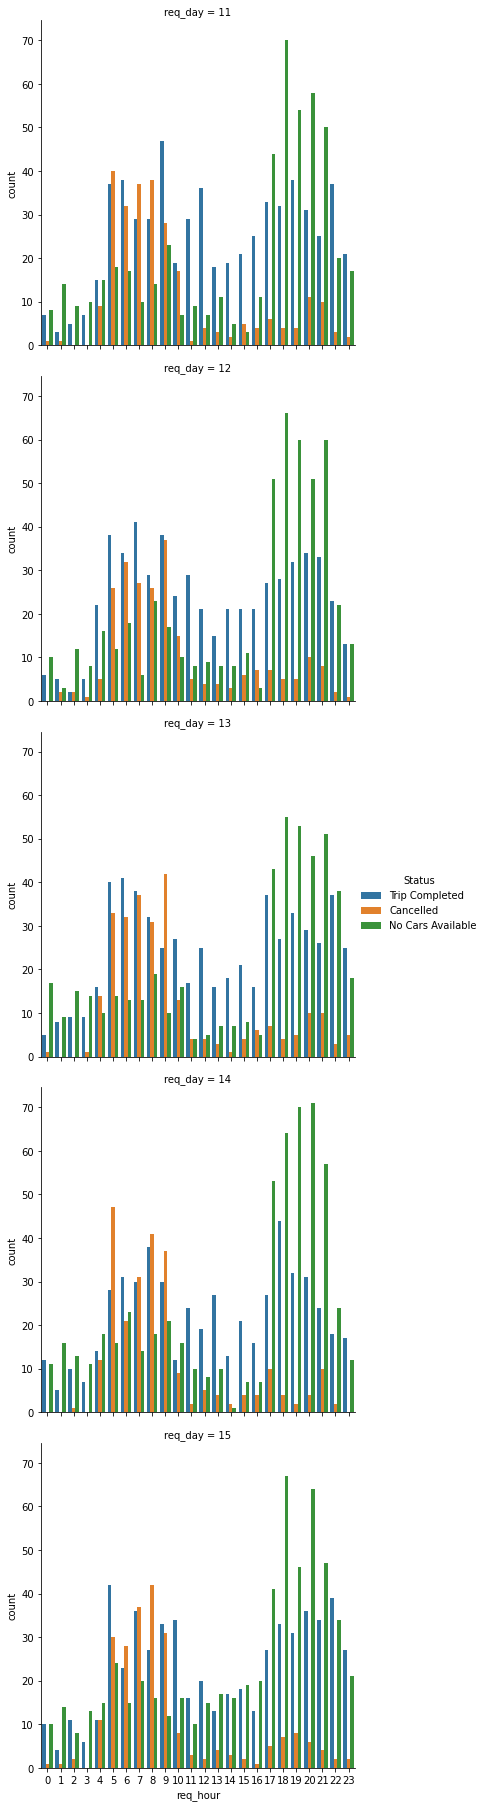

In [158]:
sns.factorplot(x="req_hour",data=df1,row="req_day",hue="Status",kind="count")
plt.show()


C:\Users\Sandy Naruto\anaconda3\sandy\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


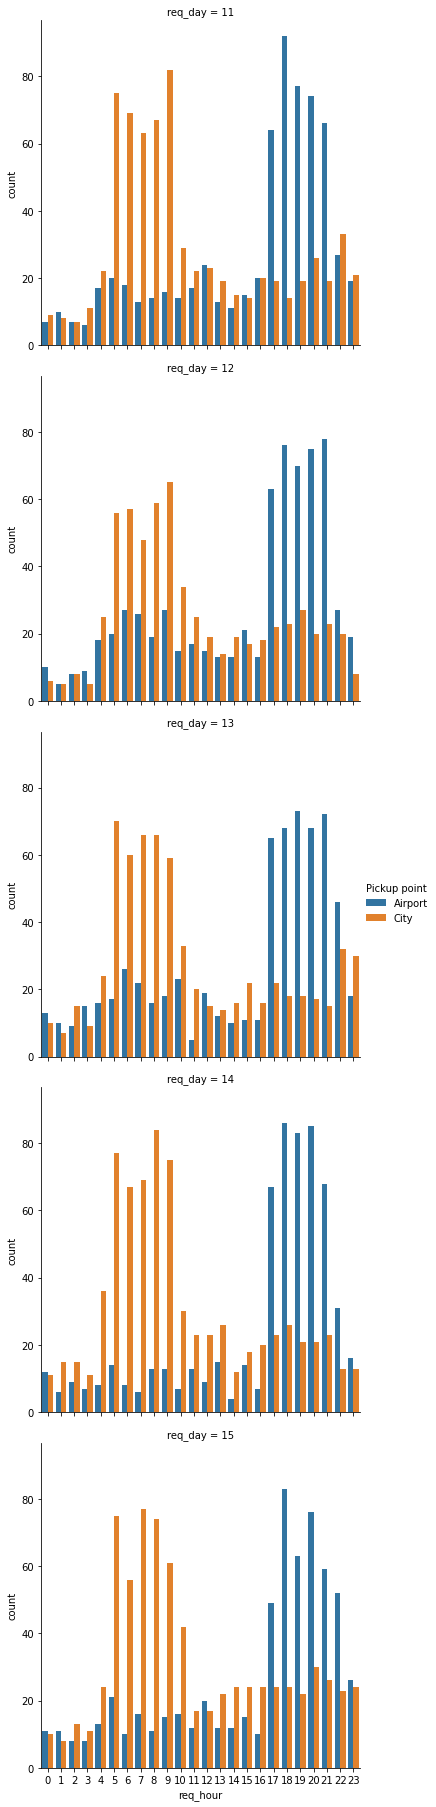

In [159]:
sns.factorplot(x="req_hour",data=df1,row="req_day",hue="Pickup point",kind="count")
plt.show()

C:\Users\Sandy Naruto\anaconda3\sandy\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


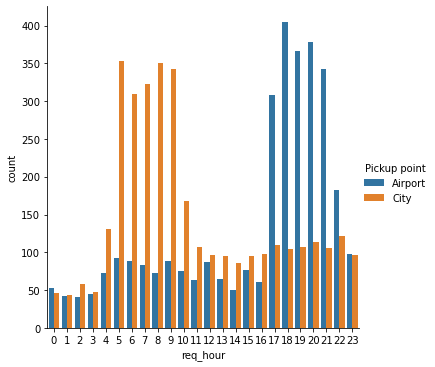

In [160]:
sns.factorplot(x="req_hour",data=df1,hue="Pickup point",kind="count")
plt.show()

In [161]:
df1.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,11
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,11
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,12
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13


In [170]:
df1.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day,req
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,11,121
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,11,187
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12,108
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,12,252
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13,104


In [172]:
df2=df1.drop("req",axis=1)

In [176]:
df2

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,11
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,11
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,12
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13
...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT,23,15
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT,23,15
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT,23,15
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT,23,15


In [207]:
df2["Time_slot"]=0

In [208]:
df2

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day,time_slot,Time_slot
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,11,Day_Time,0
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,11,Evening_Rush,0
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12,Morning_Rush,0
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,12,Evening_Rush,0
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13,Morning_Rush,0
...,...,...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT,23,15,Late_Night,0
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT,23,15,Late_Night,0
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT,23,15,Late_Night,0
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT,23,15,Late_Night,0


In [206]:
j=0
for i in df2["req_hour"]:
    if df2.iloc[j,6]<5:
        df2.iloc[j,8]="Pre_Morning"
    elif 5<=df2.iloc[j,6]<10:
        df2.iloc[j,8]="Morning_Rush"
        
    elif 10<=df2.iloc[j,6]<17:
        df2.iloc[j,8]="Day_Time"
        
    elif 17<=df2.iloc[j,6]<22:
        df2.iloc[j,8]="Evening_Rush"
    else:
        df2.iloc[j,8]="Late_Night"
    j=j+1

In [209]:
df2

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day,time_slot,Time_slot
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,11,Day_Time,0
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,11,Evening_Rush,0
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12,Morning_Rush,0
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,12,Evening_Rush,0
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13,Morning_Rush,0
...,...,...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT,23,15,Late_Night,0
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT,23,15,Late_Night,0
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT,23,15,Late_Night,0
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT,23,15,Late_Night,0


In [214]:
df2["time_slot"].value_counts()

Evening_Rush    2342
Morning_Rush    2103
Day_Time        1224
Pre_Morning      578
Late_Night       498
Name: time_slot, dtype: int64

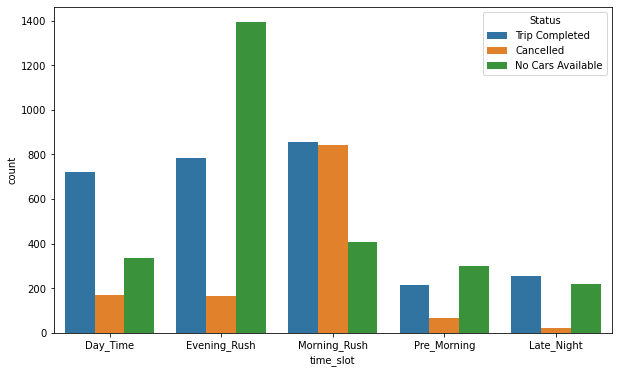

In [225]:
plt.figure(figsize=(10,6))
sns.countplot(x="time_slot",hue="Status",data=df2)
plt.show()

In [227]:
df_morning_rush=df2[df2['time_slot']=='Morning_Rush']

<AxesSubplot:xlabel='Pickup point', ylabel='count'>

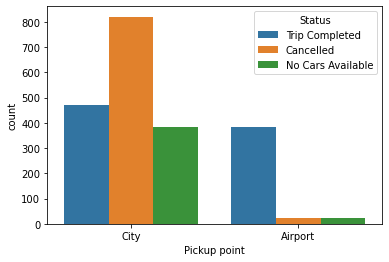

In [228]:
sns.countplot(x="Pickup point",hue="Status",data=df_morning_rush)

In [230]:
df_airport_cancelled=df_morning_rush.loc[(df_morning_rush["Pickup point"]=="Airport") & 
                                         (df_morning_rush["Status"]=="Cancelled")]

In [232]:
df_airport_cancelled.shape[0]

23

In [233]:
df_city_cancelled=df_morning_rush.loc[(df_morning_rush["Pickup point"]=="City") & (df_morning_rush["Status"]=="Cancelled")]

In [234]:
df_city_cancelled.shape[0]

820

In [235]:
df_morning_rush.loc[(df_morning_rush["Pickup point"]=="City")].shape[0]

1677

In [237]:
df_morning_rush.loc[(df_morning_rush["Pickup point"]=="City")&(df_morning_rush["Status"]=="Trip Completed")].shape[0]

472

In [239]:
df_morning_rush.loc[(df_morning_rush["Pickup point"]=="Airport")].shape[0]

426

In [240]:
df_morning_rush.loc[(df_morning_rush["Pickup point"]=="Airport")&(df_morning_rush["Status"]=="Trip Completed")].shape[0]

382

In [245]:
df_evening_rush=df2[df2['time_slot']=='Evening_Rush']


In [257]:
df_city_cancelled=df_evening_rush.loc[(df_evening_rush["Pickup point"]=="City") & (df_evening_rush["Status"]=="Cancelled")]

<AxesSubplot:xlabel='Pickup point', ylabel='count'>

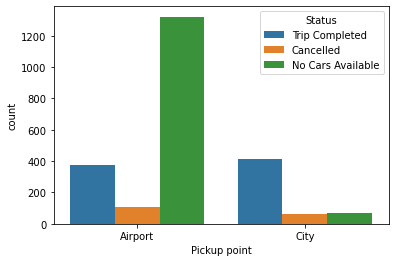

In [258]:
sns.countplot(x="Pickup point",hue="Status",data=df_evening_rush)

In [259]:
df_city_cancelled.shape[0]

60

In [260]:
df_evening_rush["Status"].value_counts()

No Cars Available    1392
Trip Completed        784
Cancelled             166
Name: Status, dtype: int64

In [261]:
df_evening_rush.loc[(df_evening_rush["Pickup point"]=="City")].shape[0]

542

In [262]:
df_evening_rush.loc[(df_evening_rush["Pickup point"]=="City") & (df_evening_rush["Status"]=="Trip Completed")].shape[0]

411

In [263]:
df_evening_rush.loc[(df_evening_rush["Pickup point"]=="Airport")].shape[0]

1800

In [264]:
df_evening_rush.loc[(df_evening_rush["Pickup point"]=="Airport") & (df_evening_rush["Status"]=="Trip Completed")].shape[0]

373

In [265]:
df_evening_rush.loc[(df_evening_rush["Pickup point"]=="Airport") & (df_evening_rush["Status"]=="Cancelled")].shape[0]

106

In [266]:
df_evening_rush.loc[(df_evening_rush["Pickup point"]=="City") & (df_evening_rush["Status"]=="Cancelled")].shape[0]

60